In [57]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img1 = cv.imread('image1.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('image2.jpg', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('magazine3.jpg', cv.IMREAD_GRAYSCALE)
img4 = cv.imread('magazine4.jpg', cv.IMREAD_GRAYSCALE)
img5 = cv.imread('magazine5.jpg', cv.IMREAD_GRAYSCALE)
img6 = cv.imread('magazine6.jpg', cv.IMREAD_GRAYSCALE)

In [58]:
def fast_brief_bf(img1, img2, threshold=10, nonmax_suppression=True):
    fast = cv.FastFeatureDetector_create(threshold, nonmax_suppression,)
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
    
    kp1 = fast.detect(img1, None)
    kp1, des1 = brief.compute(img1, kp1)

    kp2 = fast.detect(img2, None)
    kp2, des2 = brief.compute(img2, kp2)

    bf = cv.BFMatcher_create(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    matches = sorted(matches, key = lambda m: m.distance)
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:30], None, 
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2_imshow(img3)

In [59]:
def custom_matcher(des1, des2):
    matches = []
    for i in range(len(des1)):
        min_dist = 255
        des1_index = None
        des2_index = None
        for j in range(len(des2)):
            dist = 0
            for d1, d2 in zip(des1[i], des2[j]):
                dist += bin(d1 ^ d2).count("1")
            if min_dist > dist:
                min_dist = dist
                des1_index = i
                des2_index = j
        matches.append(cv.DMatch(des1_index, des2_index, min_dist))
    
    return matches

In [60]:
def fast_brief_custom(img1, img2, threshold=10, nonmax_suppression=True):
    fast = cv.FastFeatureDetector_create(threshold, nonmax_suppression,)
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
    
    kp1 = fast.detect(img1, None)
    kp1, des1 = brief.compute(img1, kp1)

    kp2 = fast.detect(img2, None)
    kp2, des2 = brief.compute(img2, kp2)

    bf = cv.BFMatcher_create(cv.NORM_HAMMING, crossCheck=True)
    matches = custom_matcher(des1, des2)

    matches = sorted(matches, key = lambda m: m.distance)
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:30], None, 
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2_imshow(img3)

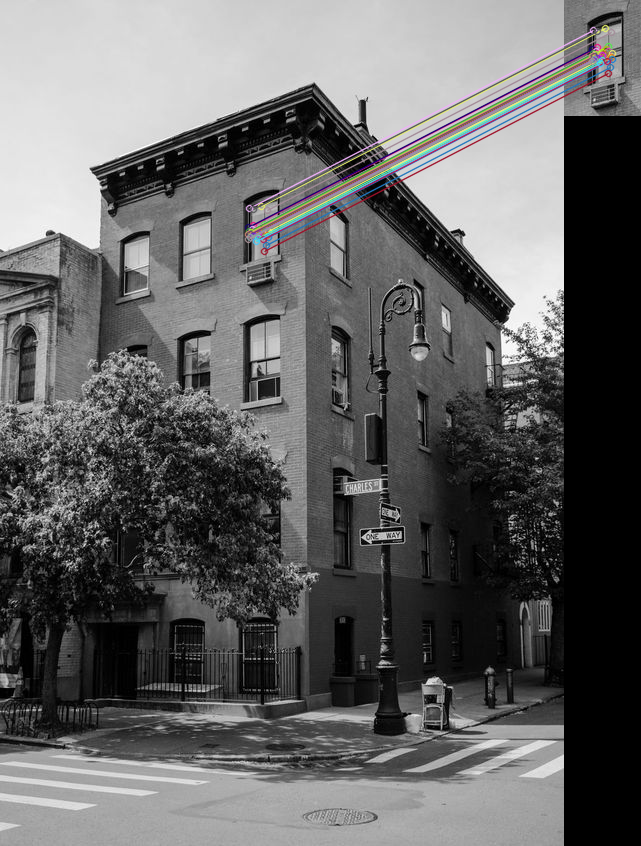

In [61]:
fast_brief_bf(img1, img2)

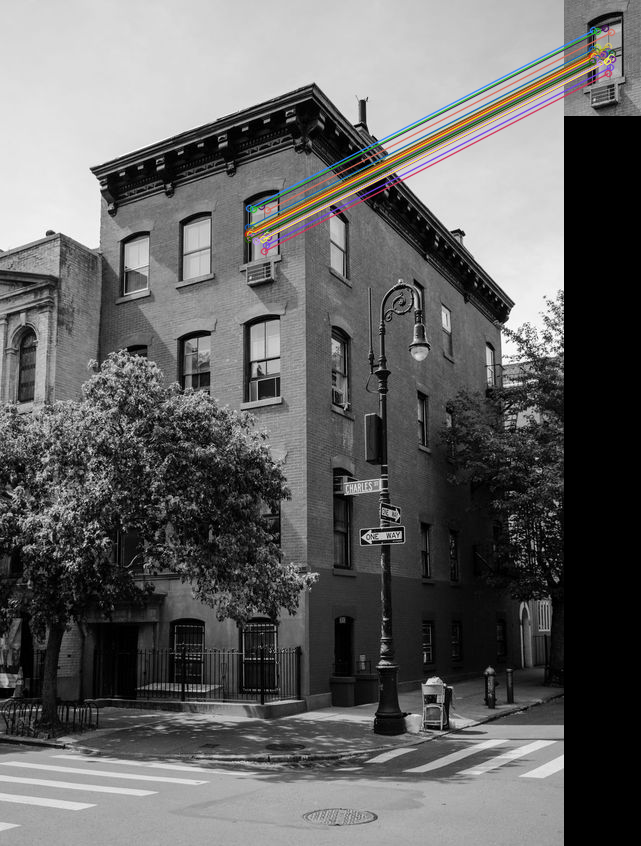

In [62]:
fast_brief_custom(img1, img2)

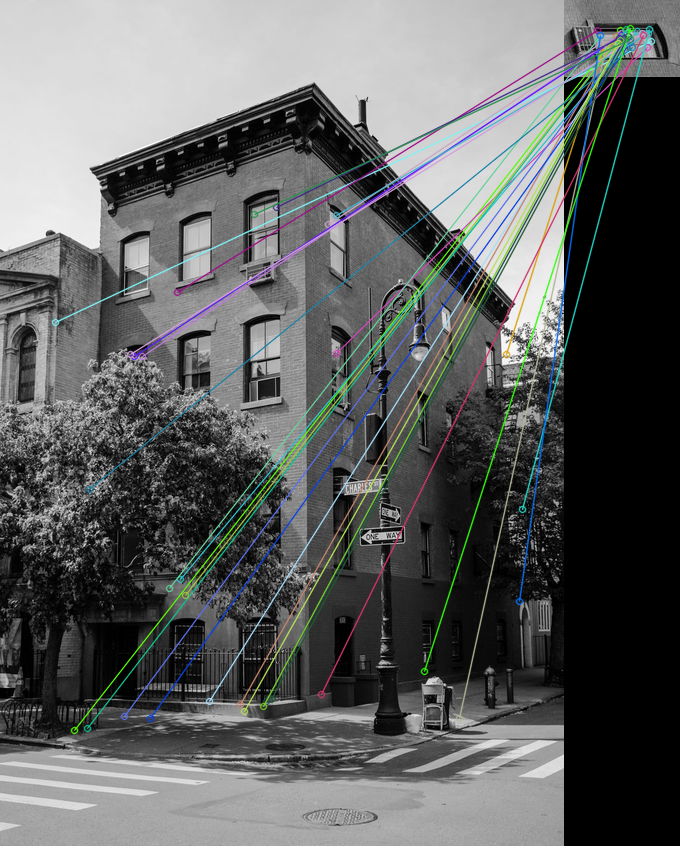

In [67]:
rotated = cv.rotate(img2, cv.ROTATE_90_CLOCKWISE)
fast_brief_bf(img1, rotated)

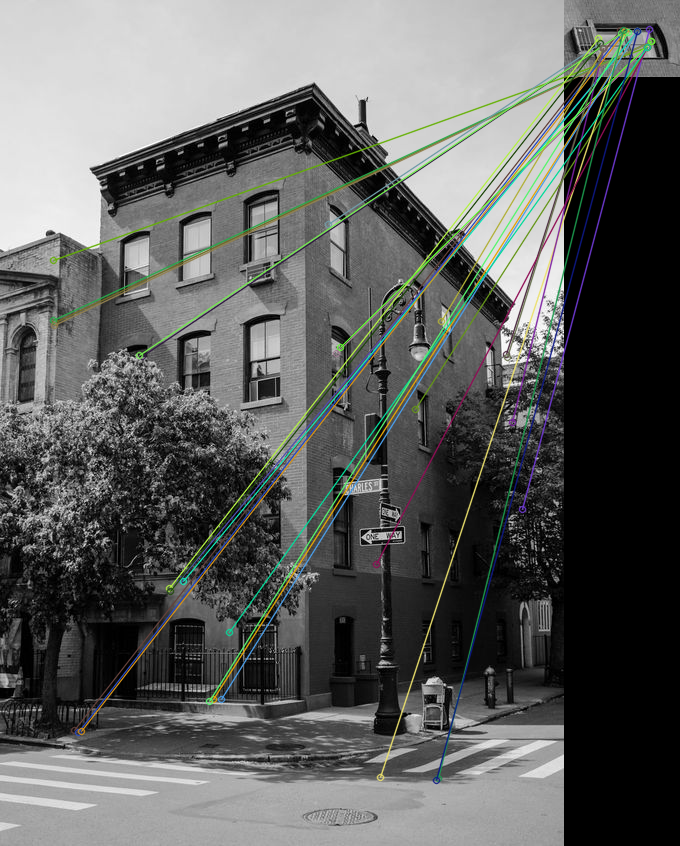

In [68]:
fast_brief_custom(img1, rotated)

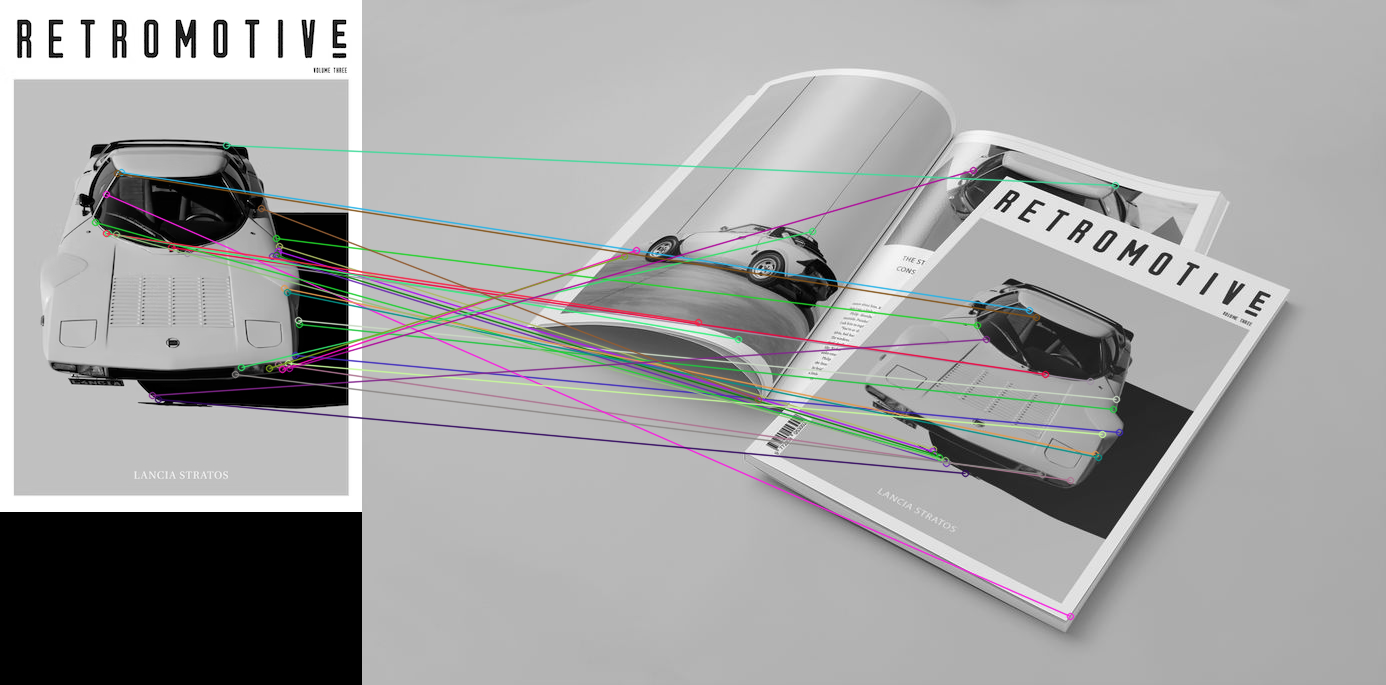

In [63]:
fast_brief_bf(img3, img4)

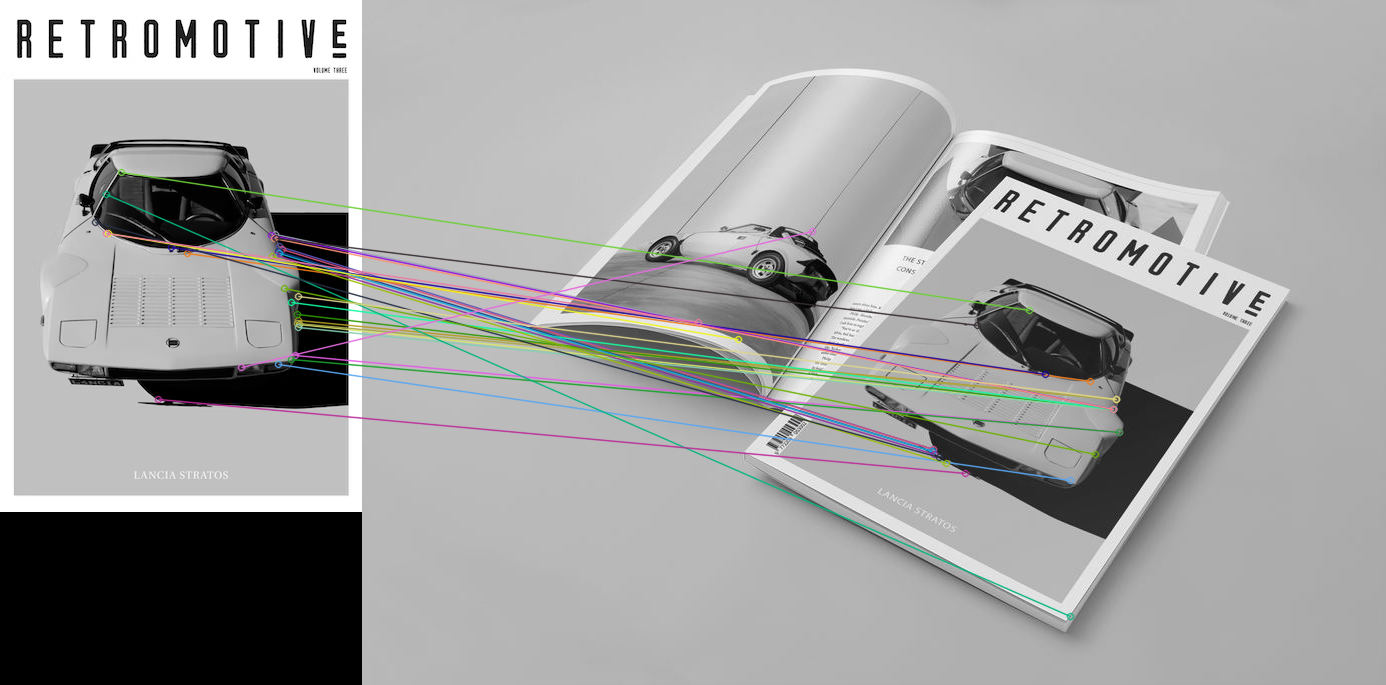

In [64]:
fast_brief_custom(img3, img4)

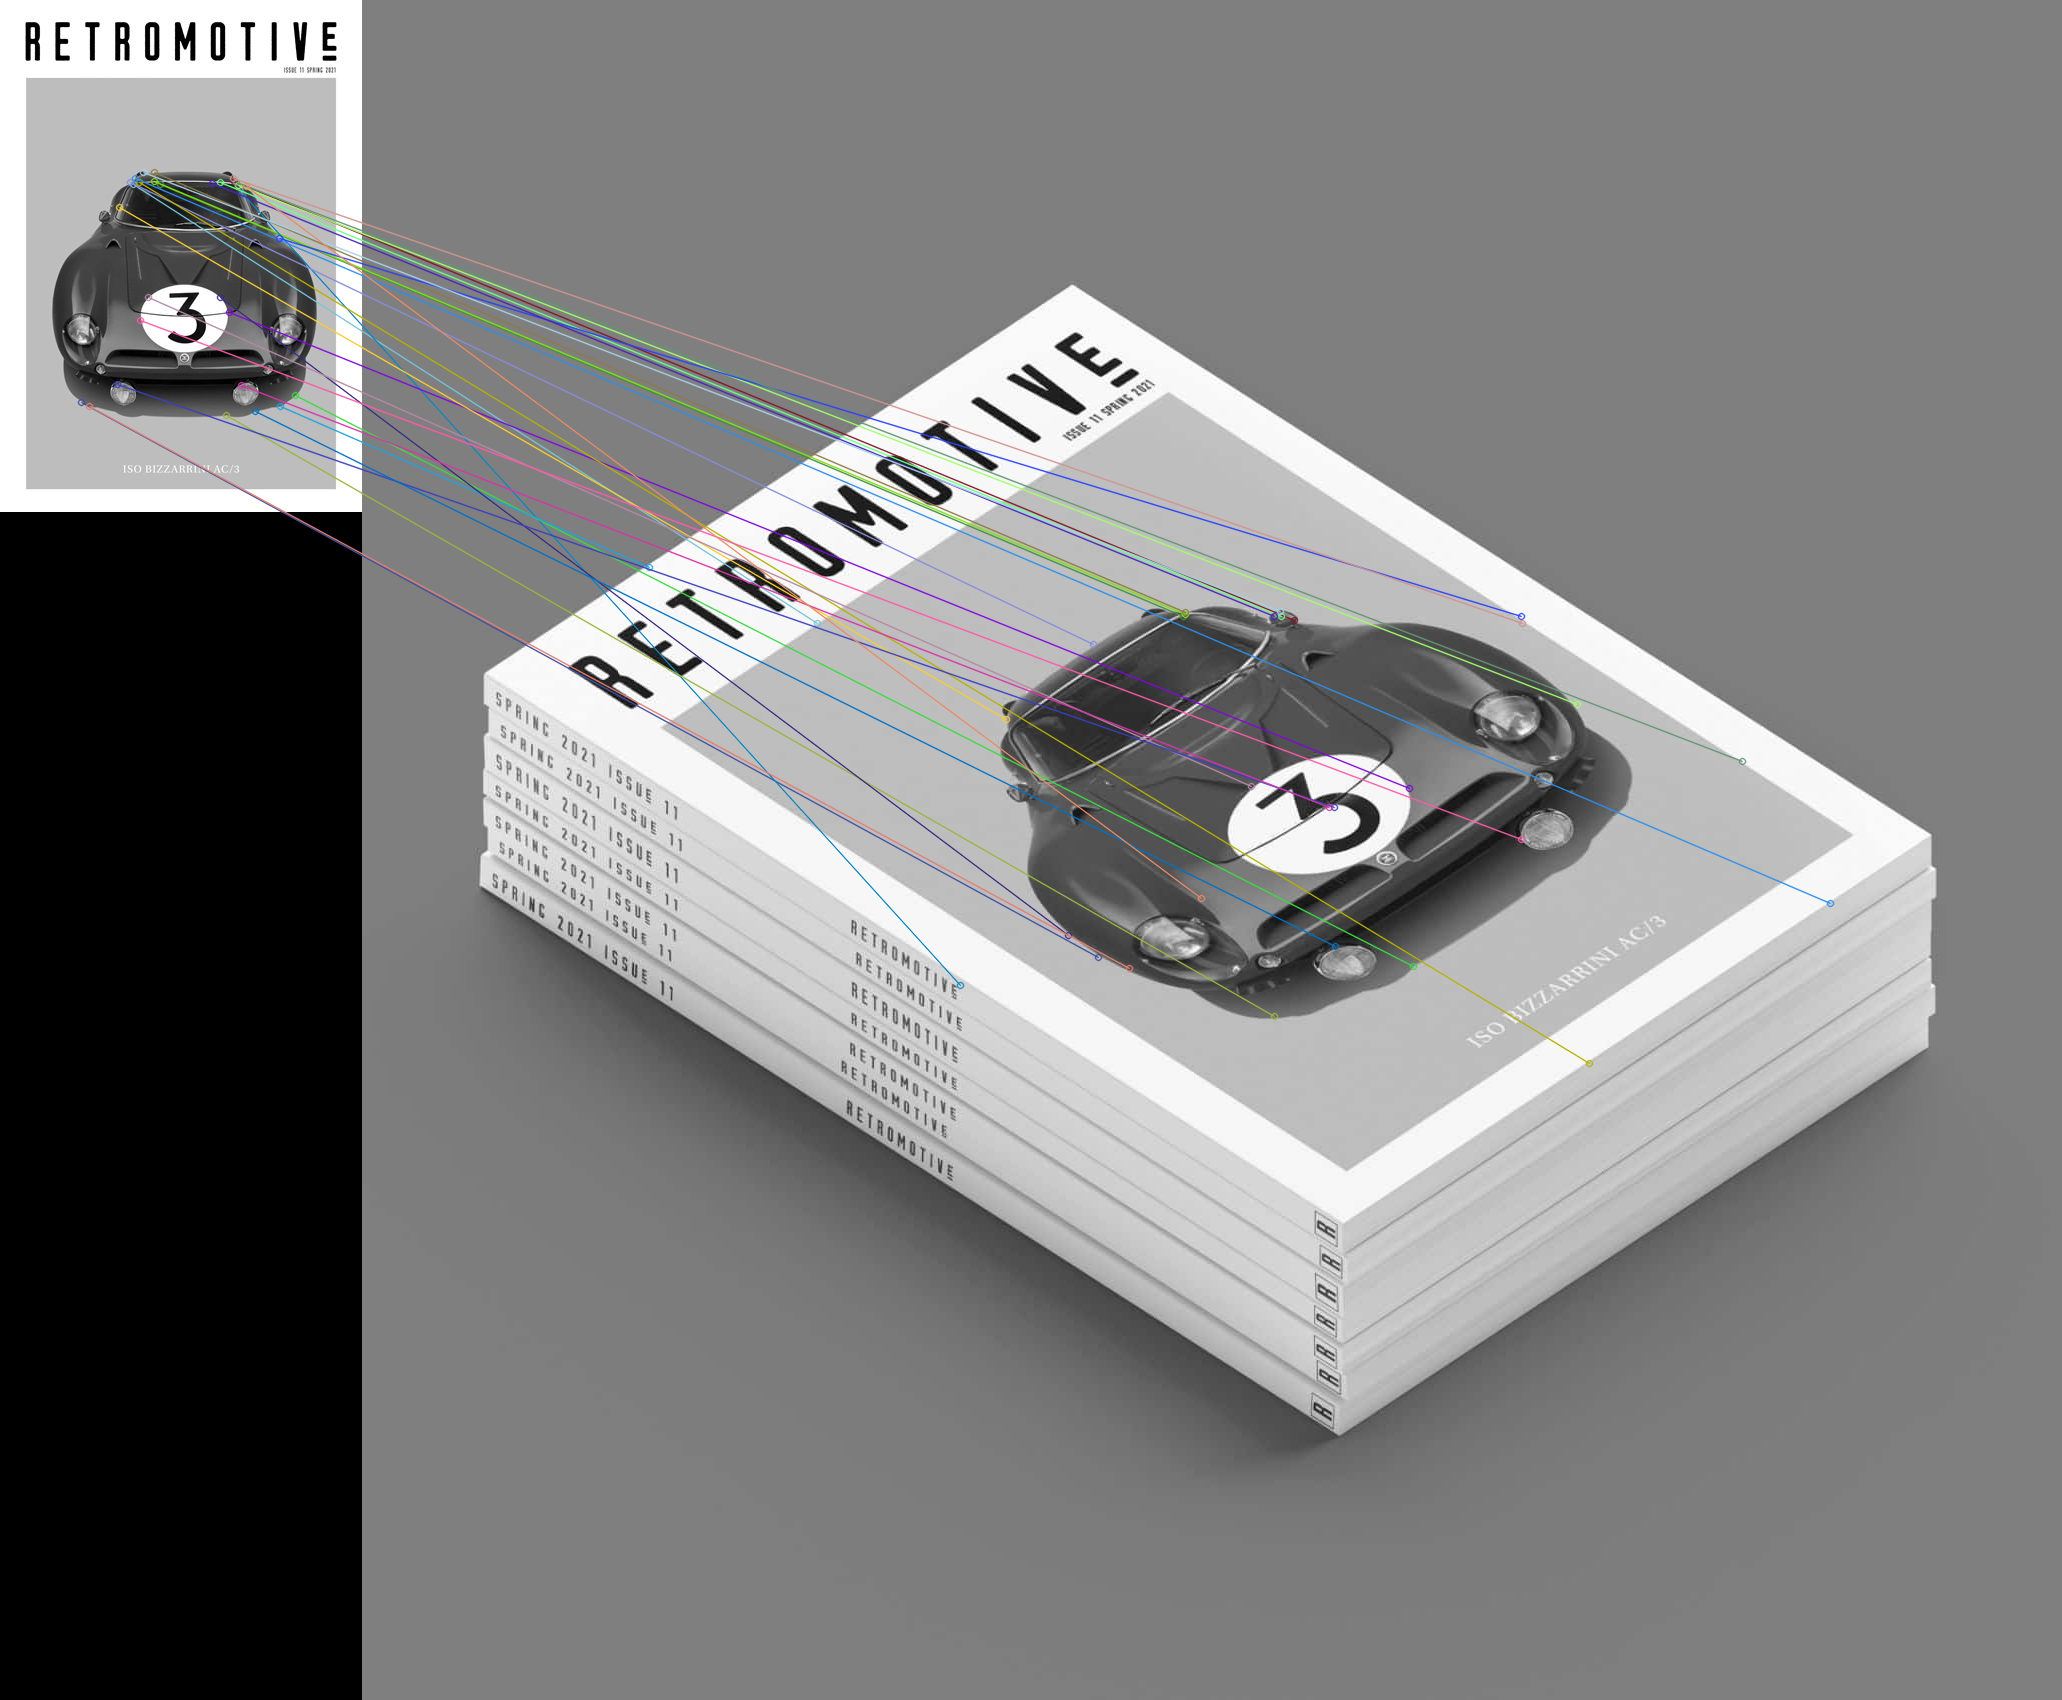

In [65]:
fast_brief_bf(img5, img6)

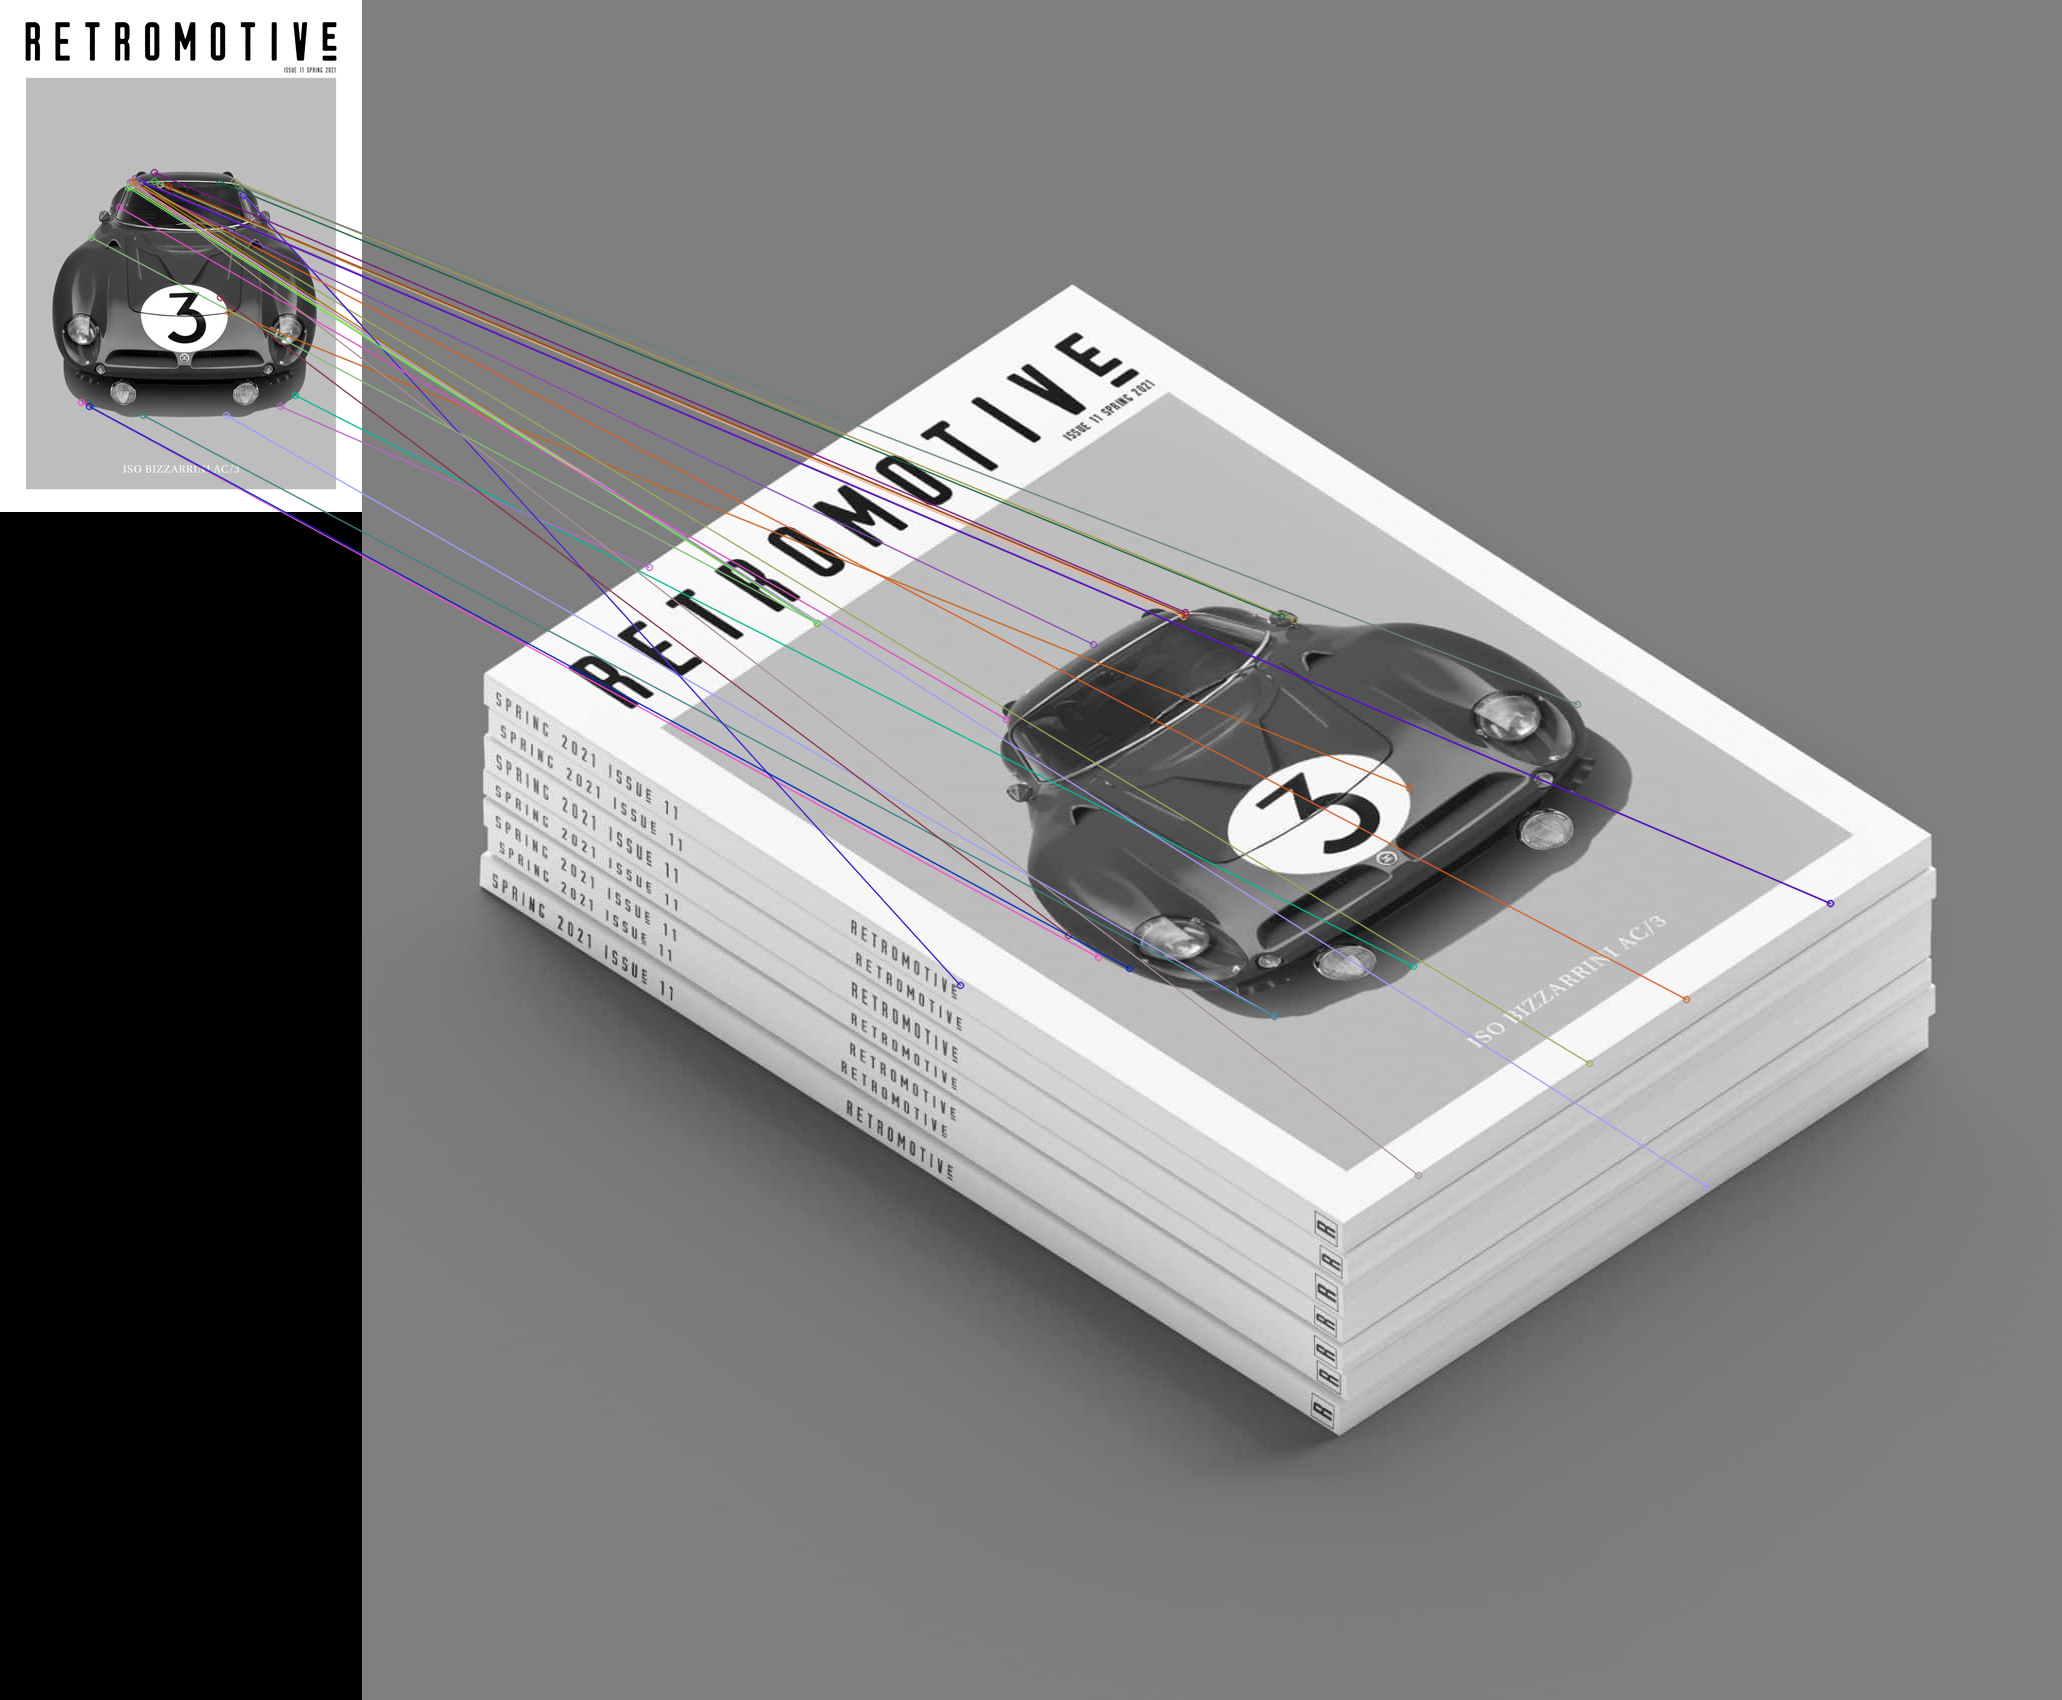

In [66]:
fast_brief_custom(img5, img6)